In [1]:
import numpy as np
import itertools
import sklearn.metrics  as metrics
from scipy.stats import zscore
from sklearn.preprocessing import normalize
import sklearn.cross_validation as cv
%load_ext autoreload
%autoreload 2
%aimport utils
from LogisticRegressionClassifier import LogisticRegressionClassifier

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
fft_dict, fft_labels, ffts = utils.read_features(feature='fft')
fft_dict

{'blues': 5,
 'classical': 6,
 'country': 8,
 'disco': 9,
 'hiphop': 7,
 'jazz': 2,
 'metal': 0,
 'pop': 1,
 'reggae': 4,
 'rock': 3}

In [5]:
lrc_fft = LogisticRegressionClassifier(ffts, fft_labels, fft_dict)

In [7]:
lrc_fft.cross_validate(3)

Training cross validation round 0
----------------------------------
Step 0: Error: -1.000000 updating learning rate: 0.001000
Final Step 1000: Error: 0.105710 
 Learn rate: 0.001000
classification report 
----------------------------------
             precision    recall  f1-score   support

      metal       0.61      0.70      0.65        40
        pop       0.53      0.41      0.47        41
       jazz       0.24      0.23      0.23        31
       rock       0.24      0.27      0.25        33
     reggae       0.23      0.29      0.25        28
      blues       0.32      0.28      0.30        32
  classical       0.37      0.91      0.53        23
     hiphop       0.27      0.17      0.21        36
    country       0.26      0.17      0.20        36
      disco       0.38      0.26      0.31        34

avg / total       0.35      0.36      0.34       334

Confusion matrix
----------------------------------
[[28  0  0  2  1  3  1  2  1  2]
 [ 0 17  5  3  5  1  0  4  2  4]
 [

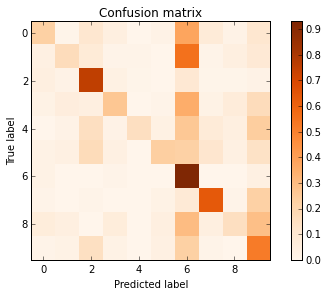

In [171]:
_ = utils.plot_confusion_matrix(report)

In [154]:
def debug_lrc(lrc):
  
    
    print(lrc.X.shape),
    print(lrc.X_test.shape),
    print(lrc.y.shape),
    print(lrc.y_test.shape),
    print(lrc.Delta.shape),
    print(lrc.W.shape),
    print(lrc._X.shape)
    

In [9]:
mfc_dict, mfc_labels, mfcs = utils.read_features(feature='mfc')

In [10]:
lrc_mfc = LogisticRegressionClassifier(mfcs, mfc_labels, mfc_dict)

In [11]:
lrc_mfc.metrics

{'train_rounds': 0}

In [14]:
lrc_mfc.cross_validate(3)

Training cross validation round 0
----------------------------------
Step 0: Error: -1.000000 updating learning rate: 0.001000
Final Step 1000: Error: 0.104261 
 Learn rate: 0.001000
classification report 
----------------------------------
             precision    recall  f1-score   support

      metal       0.69      0.67      0.68        33
        pop       0.62      0.87      0.72        30
       jazz       0.49      0.50      0.49        36
       rock       0.33      0.29      0.31        35
      blues       0.50      0.42      0.46        40
     reggae       0.43      0.54      0.48        28
  classical       0.81      0.85      0.83        34
     hiphop       0.38      0.41      0.39        29
    country       0.52      0.31      0.39        42
      disco       0.42      0.48      0.45        27

avg / total       0.52      0.52      0.52       334

Confusion matrix
----------------------------------
[[22  0  0  1  3  0  0  5  0  2]
 [ 0 26  0  0  0  2  0  0  1  1]
 [

In [ ]:
lrc_mfc.prediction(lrc_mfc.W, lrc_mfc.X_test)

In [ ]:
lrc_mfc.train(reset=False, eta=0.001)

In [ ]:
lrc_mfc.metrics

In [138]:
mfc_pred, mfc_probas = lrc_mfc.prediction(lrc_mfc.W, mfcs)

             precision    recall  f1-score   support

          0       0.43      0.55      0.48       100
          1       0.47      0.14      0.22       100
          2       0.38      0.97      0.55       100
          3       0.50      0.06      0.11       100
          4       0.57      0.04      0.07       100
          5       0.49      0.88      0.63       100
          6       0.62      0.15      0.24       100
          7       0.57      0.50      0.53       100
          8       0.29      0.02      0.04       100
          9       0.20      0.55      0.30       100

avg / total       0.45      0.39      0.32      1000



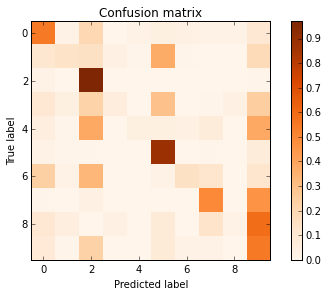

In [139]:
print(metrics.classification_report(mfc_labels, mfc_pred))
cm = utils.plot_confusion_matrix(metrics.confusion_matrix(mfc_labels, mfc_pred))

In [135]:
kf = cv.KFold(10, n_folds = 2, shuffle=True)
for i, k  in enumerate(kf):
    print( i, list(k))

0 [array([1, 5, 6, 7, 8]), array([0, 2, 3, 4, 9])]
1 [array([0, 2, 3, 4, 9]), array([1, 5, 6, 7, 8])]


In [2]:
import sklearn
sklearn.__version__

'0.16.0'

In [5]:
from sklearn import datasets
from sklearn import svm
import sklearn.cross_validation as cv

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [6]:
clf = svm.SVC(kernel='linear', C=1)
scores = cv.cross_val_score(
    clf, iris.data, iris.target, cv=5)

In [42]:
scores

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

In [43]:
cv.cross_val_score

0.98000000000000009

In [8]:
predicted = cv.cross_val_predict(clf, iris.data,iris.target, cv=10)

In [12]:
print(metrics.classification_report(iris.target, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.94      0.96        50
          2       0.94      0.98      0.96        50

avg / total       0.97      0.97      0.97       150



In [18]:
kf = cv.KFold(iris.data.shape[0], n_folds = 10, shuffle=True)
for test, train in kf:
    X_train, X_test, y_train, y_test = \
            iris.data[train], iris.data[test], iris.target[train], iris.target[test]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(metrics.confusion_matrix(y_test, pred))
    

[[42  0  0]
 [ 0 26 23]
 [ 0  1 43]]
[[45  0  0]
 [ 0 43  2]
 [ 0  2 43]]
[[45  0  0]
 [ 0 42  4]
 [ 0  0 44]]
[[47  0  0]
 [ 0 43  0]
 [ 0  6 39]]
[[45  0  0]
 [ 0 45  0]
 [ 0  9 36]]
[[43  0  0]
 [ 3 44  0]
 [ 0 13 32]]
[[46  0  0]
 [ 0 37  8]
 [ 0  1 43]]
[[47  0  0]
 [ 0 39  4]
 [ 0  0 45]]
[[45  0  0]
 [ 0 43  0]
 [ 0 19 28]]
[[45  0  0]
 [ 0 43  1]
 [ 0  7 39]]
